In [1]:
from DHFES import *
from DHFES.membershipFun import *
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
xp = np.linspace(0,100,1000)

In [ ]:
y1 = gaussmf(xp,50,10)
y2 = gaussmf(xp,48,15)
y3 = gaussmf(xp,45,17)

plt.figure(figsize=(8,5))
plt.plot(xp,y1,label='membership degree1')
plt.plot(xp,y2,label='membership degree2')
plt.plot(xp,y3,label='membership degree3')

plt.legend()

In [ ]:
x = 80
md1 = gaussmf(x,50,10)
md2 = gaussmf(x,48,15)
md3 = gaussmf(x,45,5)

md = [md1,md2,md3]
MD = np.array(md)

In [274]:
from DHFES.membershipFun import *
import numpy as np
from matplotlib import pyplot as plt

class MemshipFC(object):
    memFunc = ''
    parameter = []
    numFunc = 0
    
    _variable_start = 0
    _variable_end = 1
    _linspace = 100
    
    def __init__(self,memFunc,parameter,numFunc):
        """
            Set membership conditions：
            ===============================================
            Parameter:
                sigmf:   (a,b)     ->[(a,b)]     ->tuple /
                trimf:   [a,b,c]   ->[[a,b,c]]   ->list  /
                zmf:     (a,b)     ->[(a,b)]     ->tuple /
                trapmf:  [a,b,c,d] ->[[a,b,c,d]] ->list
                smf:     (a,b)     ->[(a,b)]     ->tuple /
                gaussmf: (a,b)     ->[(a,b)]     ->tuple /
                gauss2mf:(a,b,c,d) ->[(a,b,c,d)] ->tuple /
                gbellmf: (a,b,c)   ->[(a,b,c)]   ->tuple /
        """
        assert len(parameter) == numFunc,\
        'ERROR!The number of parameters is not equal to numFunc! numFunc=%d means you should create %d sets of parameters'%(numFunc,numFunc)
        if memFunc == 'sigmf' or memFunc == 'zmf' or memFunc == 'smf' or memFunc == 'gaussmf':
            for para in parameter:
                assert type(para) == tuple, 'ERROR:The %s function\'s parameter type is error!Parameter type should be tuple!'%memFunc
                assert len(para) == 2,'ERROR:The number of the %s function is error!The number of parameters should be 2'%memFunc
        if memFunc == 'gauss2mf':
            for para in parameter:
                assert type(para) == tuple,'ERROR:The %s function\'s parameter type is error!Parameter type should be tuple!'%memFunc
                assert len(para) == 4,'ERROR:The number of the %s function is error!The number of parameters should be 4'%memFunc
        if memFunc == 'gbellmf':
            for para in parameter:
                assert type(para) == tuple,'ERROR:The %s function\'s parameter type is error!Parameter type should be tuple!'%memFunc
                assert len(para) == 3,'ERROR:The number of the %s function is error!The number of parameters should be 3'%memFunc
        if memFunc == 'trimf':
            for para in parameter:
                assert type(para) == list,'ERROR:The %s function\'s parameter type is error!Parameter type should be list!'%memFunc
                assert len(para) == 3,'ERROR:The number of the %s function is error!The number of parameters should be 3'%memFunc
        if memFunc == 'trapmf':
            for para in parameter:
                assert type(para) == list,'ERROR:The %s function\'s parameter type is error!Parameter type should be list!'%memFunc
                assert len(para) == 4,'ERROR:The number of the %s function is error!The number of parameters should be 4'%memFunc

        self.memFunc = memFunc
        self.parameter = parameter
        self.numFunc = numFunc
        
    def __repr__(self):
        """
            Print information of membership function.
        """
        s = ''
        for i in range(self.numFunc):
            s+='Membership function %d: %s, parameter:%s \n'%(i+1,self.memFunc,self.parameter[i])
        return s
        
    def setvariable(self,start,end,linspace):
        """
            设置自变量变化范围，返回一个 start-end ，间隔为 linspace 的 array
            该函数用来生成隶属函数实例的空间范围
        """
        self._variable_start = start
        self._variable_end = end
        self._linspace = linspace
        print ('Successful seted!')
        
    def MF_Plot(self):
        """
            画出隶属度曲线图，方便设置可能隶属度
        """
        x = np.linspace(self._variable_start,self._variable_end,self._linspace)
        y = []
        for i in range(self.numFunc):
            if self.memFunc == 'sigmf':
                y.append(sigmf(x,self.parameter[i][0],self.parameter[i][1]))
            if self.memFunc == 'zmf':
                y.append(zmf(x,self.parameter[i][0],self.parameter[i][1]))
            if self.memFunc == 'smf':
                y.append(smf(x,self.parameter[i][0],self.parameter[i][1]))
            if self.memFunc == 'gaussmf':
                y.append(gaussmf(x,self.parameter[i][0],self.parameter[i][1]))
            if self.memFunc == 'gauss2mf':
                y.append(gauss2mf(x,self.parameter[i][0],self.parameter[i][1],self.parameter[i][2],self.parameter[i][3]))
            if self.memFunc == 'gbellmf':
                y.append(gbellmf(x,self.parameter[i][0],self.parameter[i][1],self.parameter[i][2]))
            if self.memFunc == 'trimf':
                y.append(trimf(x,self.parameter[i]))
            if self.memFunc == 'trapmf':
                y.append(trapmf(x,self.parameter[i]))
        plt.figure(figsize=(8,5))
        p = []
        for j in range(self.numFunc):
            plt.plot(x,y[j],label=self.memFunc+'_%d'%(j+1))
        plt.legend()
        
    def calculate_MD(self,x):
        """
            通过隶属度方程，计算隶属度集合
        """
        y = []
        for i in range(self.numFunc):
            if self.memFunc == 'sigmf':
                y.append(sigmf(x,self.parameter[i][0],self.parameter[i][1]))
            if self.memFunc == 'zmf':
                y.append(zmf(x,self.parameter[i][0],self.parameter[i][1]))
            if self.memFunc == 'smf':
                y.append(smf(x,self.parameter[i][0],self.parameter[i][1]))
            if self.memFunc == 'gaussmf':
                y.append(gaussmf(x,self.parameter[i][0],self.parameter[i][1]))
            if self.memFunc == 'gauss2mf':
                y.append(gauss2mf(x,self.parameter[i][0],self.parameter[i][1],self.parameter[i][2],self.parameter[i][3]))
            if self.memFunc == 'gbellmf':
                y.append(gbellmf(x,self.parameter[i][0],self.parameter[i][1],self.parameter[i][2]))
            if self.memFunc == 'trimf':
                y.append(trimf(x,self.parameter[i]))
            if self.memFunc == 'trapmf':
                y.append(trapmf(x,self.parameter[i]))
        return np.array(y)

In [275]:
x = MemshipFC('gaussmf',[(0.33,0.092),(0.35,0.104),(0.312,0.097)],3)

In [276]:
x.setvariable(0,1,100)

Successful seted!


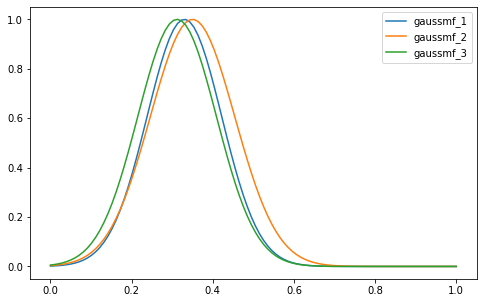

In [277]:
x.MF_Plot()

In [278]:
x

Membership function 1: gaussmf, parameter:(0.33, 0.092) 
Membership function 2: gaussmf, parameter:(0.35, 0.104) 
Membership function 3: gaussmf, parameter:(0.312, 0.097) 

In [279]:
x.calculate_MD(0.26)

array([0.7487, 0.6877, 0.8662])